In [2]:
import requests
from bs4 import BeautifulSoup as bs
import json
import requests
from PIL import Image
from io import BytesIO
from colorthief import ColorThief
import matplotlib.pyplot as plt

In [4]:
import pandas as pd 
import numpy as np 
import random 

In [ ]:
import requests
import random

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import random

In [ ]:
# pip install colorgram

# Data

The imformation is extracted from The Movie DB from https://www.themoviedb.org/ using API key

In [38]:
api_key = "3039136bdade60a401af3af4c8024a39"  

url = "https://api.themoviedb.org/3/authentication/token/new"

params = {
    "api_key": api_key
}

headers = {
    "accept": "application/json"
}

response = requests.get(url, headers=headers, params=params)

print(response.text)

{"success":true,"expires_at":"2025-06-19 07:29:33 UTC","request_token":"94f92d83bd3a63fe87365f366a9b91dd2d13892f"}


In [8]:
movie_names = ['Avatar', 'Inception', 'Chicago']  # List of movie titles

def get_movie_info(movie_name):
    search_url = 'https://api.themoviedb.org/3/search/movie'
    params = {'api_key': api_key, 'query': movie_name}
    
    response = requests.get(search_url, params=params)
    data = response.json()
    
    if data['results']:
        movie = data['results'][0]
        movie_id = movie['id']
        
        details_url = f'https://api.themoviedb.org/3/movie/{movie_id}'
        details_params = {'api_key': api_key}
        details_response = requests.get(details_url, params=details_params)
        details = details_response.json()
        
        title = details.get('title')
        description = details.get('overview')
        poster_path = details.get('poster_path')
        poster_url = f'https://image.tmdb.org/t/p/w500{poster_path}' if poster_path else 'No poster available'
        
        return {'title': title, 'description': description, 'poster_url': poster_url}
    else:
        return {'title': movie_name, 'description': 'Not found', 'poster_url': None}

for movie_name in movie_names:
    info = get_movie_info(movie_name)
    print(f"Title: {info['title']}")
    print(f"Description: {info['description']}")
    print(f"Poster URL: {info['poster_url']}")
    print('---')


Title: Avatar
Description: In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.
Poster URL: https://image.tmdb.org/t/p/w500/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
---
Title: Inception
Description: Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person's idea into a target's subconscious.
Poster URL: https://image.tmdb.org/t/p/w500/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
---
Title: Chicago
Description: Based on a true story, two-timing boozing wife Roxie Hart kills her lover in cold blood after he leaves her, and finagles her way out being indicted. The basis for Kander/Ebb's 1975 Broadway musical of the same name and its Oscar-winning 2002 film adaptation.
Poster URL: https://image.tmdb.org/t/p

In [18]:
top_movies = []
page = 1

while len(top_movies) < 30:
    url = 'https://api.themoviedb.org/3/movie/popular'
    params = {
        'api_key': api_key,
        'page': page
    }
    response = requests.get(url, params=params)
    data = response.json()

    results = data.get('results', [])
    top_movies.extend(results)
    page += 1

# Trim to top 30
top_30 = top_movies[:30]

# Prepare list of dicts for DataFrame
movies_data = []
for movie in top_30:
    movies_data.append({
        'title': movie.get('title'),
        'description': movie.get('overview'),
        'rating': movie.get('vote_average'),
        'poster_url': f"https://image.tmdb.org/t/p/w500{movie.get('poster_path')}" if movie.get('poster_path') else None
    })

# Create DataFrame
df = pd.DataFrame(movies_data)

print(df)


                                        title  \
0                               Lilo & Stitch   
1                                     Sinners   
2                           A Minecraft Movie   
3                                    Sikandar   
4                               A Working Man   
5                Final Destination Bloodlines   
6                                Shadow Force   
7   Mission: Impossible - The Final Reckoning   
8                The Last Stand of Ellen Cole   
9                                  Until Dawn   
10                                    Warfare   
11                        The Ugly Stepsister   
12           Captain America: Brave New World   
13                              Lilo & Stitch   
14                            The Containment   
15                                 Snow White   
16                               Mountainhead   
17                             A Widow's Game   
18                                Tin Soldier   
19                  

In [34]:
df

,title,description,rating,poster_url
0,Lilo & Stitch,The wildly funny and touching story of a lonel...,7.098,https://image.tmdb.org/t/p/w500/tUae3mefrDVTgm...
1,Sinners,"Trying to leave their troubled lives behind, t...",7.505,https://image.tmdb.org/t/p/w500/yqsCU5XOP2mkbF...
2,A Minecraft Movie,Four misfits find themselves struggling with o...,6.485,https://image.tmdb.org/t/p/w500/yFHHfHcUgGAxzi...
3,Sikandar,A tragic accident pushes the powerful Sikandar...,5.220,https://image.tmdb.org/t/p/w500/t48miSSfe7COqg...
4,A Working Man,Levon Cade left behind a decorated military ca...,6.700,https://image.tmdb.org/t/p/w500/6FRFIogh3zFnVW...
5,Final Destination Bloodlines,"Plagued by a violent recurring nightmare, coll...",6.979,https://image.tmdb.org/t/p/w500/6WxhEvFsauuACf...
6,Shadow Force,Kyrah and Isaac were once the leaders of a mul...,6.100,https://image.tmdb.org/t/p/w500/uX6FaNE86a4Xnf...
7,Mission: Impossible - The Final Reckoning,Ethan Hunt and team continue their search for ...,7.135,https://image.tmdb.org/t/p/w500/z53D72EAOxGRqd...
8,The Last Stand of Ellen Cole,When an evil contractor goes to extreme measur...,8.036,https://image.tmdb.org/t/p/w500/oq1pGVQ2t3Cy4v...
9,Until Dawn,One year after her sister Melanie mysteriously...,6.485,https://image.tmdb.org/t/p/w500/juA4IWO52Fecx8...


In [16]:
top_movies = []
page = 1

while len(top_movies) < 20:
    url = 'https://api.themoviedb.org/3/movie/top_rated'
    params = {
        'api_key': api_key,
        'page': page
    }
    response = requests.get(url, params=params)
    data = response.json()

    results = data.get('results', [])
    top_movies.extend(results)
    page += 1

In [12]:
top_movies

[{'adult': False,
  'backdrop_path': '/zfbjgQE1uSd9wiPTX4VzsLi0rGG.jpg',
  'genre_ids': [18, 80],
  'id': 278,
  'original_language': 'en',
  'original_title': 'The Shawshank Redemption',
  'overview': 'Imprisoned in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.',
  'popularity': 32.9479,
  'poster_path': '/9cqNxx0GxF0bflZmeSMuL5tnGzr.jpg',
  'release_date': '1994-09-23',
  'title': 'The Shawshank Redemption',
  'video': False,
  'vote_average': 8.712,
  'vote_count': 28445},
 {'adult': False,
  'backdrop_path': '/tmU7GeKVybMWFButWEGl2M4GeiP.jpg',
  'genre_ids': [18, 80],
  'id': 238,
  'original_language': 'en',
  'original_title': 'The Godfather',
  'overvi

In [20]:
movies_data = []
for movie in top_movies:
    movies_data.append({
        'title': movie.get('title'),
        'description': movie.get('overview'),
        'rating': movie.get('vote_average'),
        'poster_url': f"https://image.tmdb.org/t/p/w500{movie.get('poster_path')}" if movie.get('poster_path') else None,
        'backdrop_url': f"https://image.tmdb.org/t/p/w1280{movie.get('backdrop_path')}" if movie.get('backdrop_path') else None
    })

# Create DataFrame
df = pd.DataFrame(movies_data)

df

,title,description,rating,poster_url,backdrop_url
0,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,8.712,https://image.tmdb.org/t/p/w500/9cqNxx0GxF0bfl...,https://image.tmdb.org/t/p/w1280/zfbjgQE1uSd9w...
1,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",8.686,https://image.tmdb.org/t/p/w500/3bhkrj58Vtu7en...,https://image.tmdb.org/t/p/w1280/tmU7GeKVybMWF...
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,8.571,https://image.tmdb.org/t/p/w500/hek3koDUyRQk7F...,https://image.tmdb.org/t/p/w1280/kGzFbGhp99zva...
3,Schindler's List,The true story of how businessman Oskar Schind...,8.564,https://image.tmdb.org/t/p/w500/sF1U4EUQS8YHUY...,https://image.tmdb.org/t/p/w1280/zb6fM1CX41D9r...
4,12 Angry Men,The defense and the prosecution have rested an...,8.548,https://image.tmdb.org/t/p/w500/ow3wq89wM8qd5X...,https://image.tmdb.org/t/p/w1280/bxgTSUenZDHNF...
5,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",8.537,https://image.tmdb.org/t/p/w500/39wmItIWsg5sZM...,https://image.tmdb.org/t/p/w1280/m4TUa2ciEWSlk...
6,The Dark Knight,Batman raises the stakes in his war on crime. ...,8.520,https://image.tmdb.org/t/p/w500/qJ2tW6WMUDux91...,https://image.tmdb.org/t/p/w1280/enNubozHn9pXi...
7,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",8.517,https://image.tmdb.org/t/p/w500/2CAL2433ZeIihf...,https://image.tmdb.org/t/p/w1280/90ez6ArvpO8bv...
8,The Green Mile,A supernatural tale set on death row in a Sout...,8.505,https://image.tmdb.org/t/p/w500/8VG8fDNiy50H4F...,https://image.tmdb.org/t/p/w1280/amZavErrjrdgD...
9,Parasite,"All unemployed, Ki-taek's family takes peculia...",8.499,https://image.tmdb.org/t/p/w500/7IiTTgloJzvGI1...,https://image.tmdb.org/t/p/w1280/hiKmpZMGZsrkA...


In [30]:
df.iloc[10]['poster_url']

'https://image.tmdb.org/t/p/w500/vQWk5YBFWF4bZaofAbv0tShwBvQ.jpg'

In [34]:
df.iloc[10]['backdrop_url']

'https://image.tmdb.org/t/p/w1280/suaEOtk1N1sgg2MTM7oZd2cfVp3.jpg'

In [68]:
df.to_csv('top_rated_movies.csv', index=False)

### Colors 

### With limits

In [330]:
# The movie ID you want to use (example: 278 = The Shawshank Redemption)
movie_id = 949423

# Fetch all images for that movie
images_url = f'https://api.themoviedb.org/3/movie/{movie_id}/images'
response = requests.get(images_url, params={'api_key': api_key})
images_data = response.json()

# Get the list of backdrops
backdrops = images_data.get('backdrops', [])

# Randomly select up to 10 backdrops
selected_backdrops = random.sample(backdrops, min(10, len(backdrops)))

# Construct full URLs
backdrop_urls = [f"https://image.tmdb.org/t/p/w1280{img['file_path']}" for img in selected_backdrops]

# Print or use them
for i, url in enumerate(backdrop_urls, start=1):
    print(f"Backdrop {i}: {url}")


Backdrop 1: https://image.tmdb.org/t/p/w1280/cPE7u7sLQyKUgpFzw0jR3Wdr2DH.jpg
Backdrop 2: https://image.tmdb.org/t/p/w1280/ddfGBZiyOhVCAOtffie7AiXVYiE.jpg
Backdrop 3: https://image.tmdb.org/t/p/w1280/6PR3Qi5IisCXdS3Z8augrGqwuF7.jpg
Backdrop 4: https://image.tmdb.org/t/p/w1280/jY0HbDUOtIdRC2HcTu1VHSYa2J4.jpg
Backdrop 5: https://image.tmdb.org/t/p/w1280/w2D1ZgaPhDu1DPuVr3E3YRcvSOJ.jpg
Backdrop 6: https://image.tmdb.org/t/p/w1280/9TbjP8Oo2HP2h8ZsevZVlL3H3PD.jpg
Backdrop 7: https://image.tmdb.org/t/p/w1280/6ArVj8Dgn9hrWasCgOmnqkSklUm.jpg
Backdrop 8: https://image.tmdb.org/t/p/w1280/fF05jDhbCeNYTPrjgo8x5WD7nSs.jpg
Backdrop 9: https://image.tmdb.org/t/p/w1280/tg0ycHWZZRpC3F6SusOR0Irhs1V.jpg
Backdrop 10: https://image.tmdb.org/t/p/w1280/7UQVtlZl7Hh6Zae8r0RopHQ8y2y.jpg


In [332]:
backdrop_urls

['https://image.tmdb.org/t/p/w1280/cPE7u7sLQyKUgpFzw0jR3Wdr2DH.jpg',
 'https://image.tmdb.org/t/p/w1280/ddfGBZiyOhVCAOtffie7AiXVYiE.jpg',
 'https://image.tmdb.org/t/p/w1280/6PR3Qi5IisCXdS3Z8augrGqwuF7.jpg',
 'https://image.tmdb.org/t/p/w1280/jY0HbDUOtIdRC2HcTu1VHSYa2J4.jpg',
 'https://image.tmdb.org/t/p/w1280/w2D1ZgaPhDu1DPuVr3E3YRcvSOJ.jpg',
 'https://image.tmdb.org/t/p/w1280/9TbjP8Oo2HP2h8ZsevZVlL3H3PD.jpg',
 'https://image.tmdb.org/t/p/w1280/6ArVj8Dgn9hrWasCgOmnqkSklUm.jpg',
 'https://image.tmdb.org/t/p/w1280/fF05jDhbCeNYTPrjgo8x5WD7nSs.jpg',
 'https://image.tmdb.org/t/p/w1280/tg0ycHWZZRpC3F6SusOR0Irhs1V.jpg',
 'https://image.tmdb.org/t/p/w1280/7UQVtlZl7Hh6Zae8r0RopHQ8y2y.jpg']

In [334]:
# Step 1: Download and resize all images to same size
images = []
target_size = (400, 225)  # 16:9 ratio, or use (300, 200), etc.

for url in backdrop_urls:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img = img.resize(target_size)
    images.append(img)

# Step 2: Create collage canvas (2 rows × 5 columns)
rows, cols = 2, 5
collage = Image.new("RGB", (target_size[0] * cols, target_size[1] * rows))

for i, img in enumerate(images):
    row = i // cols
    col = i % cols
    x = col * target_size[0]
    y = row * target_size[1]
    collage.paste(img, (x, y))

In [161]:
# Step 3: Save and show
# collage.save("easy_collage.jpg")
# collage.show()

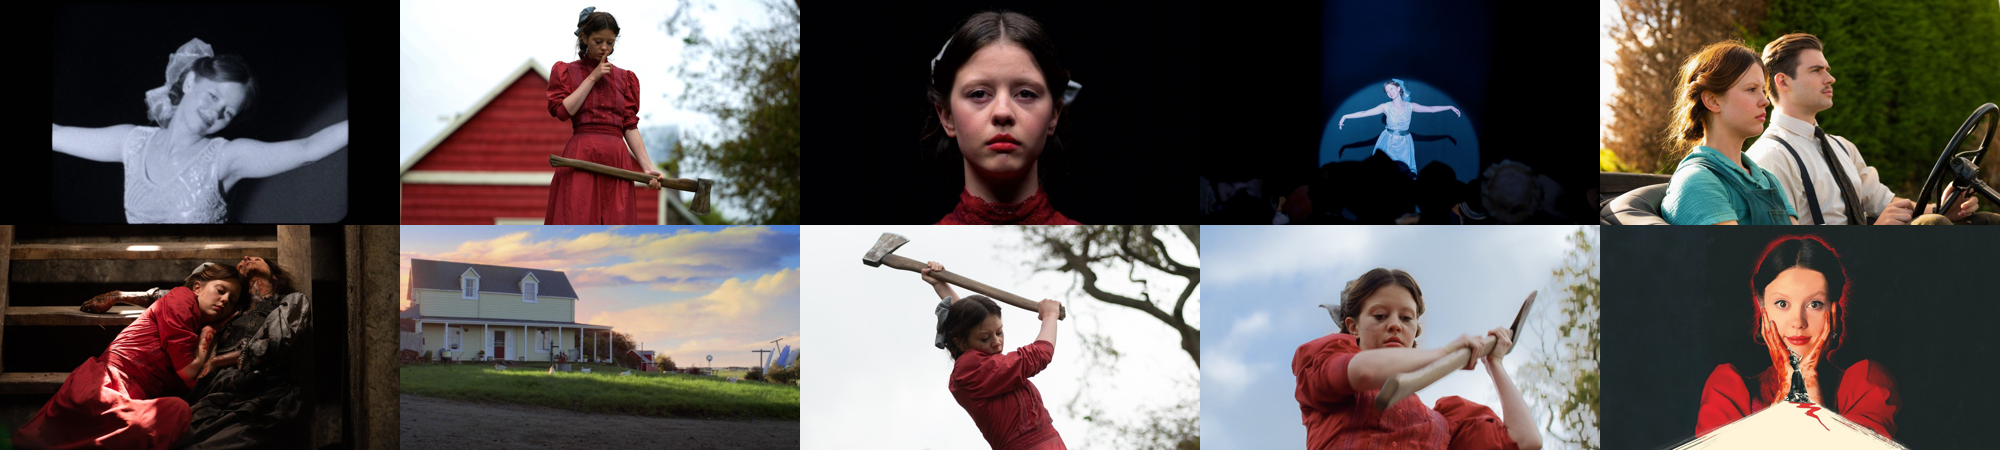

In [336]:
collage

In [338]:
buffer = BytesIO()
collage.save(buffer, format='JPEG')  # or 'PNG' if you prefer
buffer.seek(0)  # Important: reset cursor to start of buffer

# Step 2: Pass the buffer to ColorThief
color_thief = ColorThief(buffer)

# Step 3: Extract the dominant colors palette
palette = color_thief.get_palette(color_count=6)

# Step 4: Print colors
for i, color in enumerate(palette, 1):
    print(f"Color {i}: RGB{color}")

Color 1: RGB(207, 203, 202)
Color 2: RGB(24, 23, 20)
Color 3: RGB(117, 69, 61)
Color 4: RGB(128, 157, 167)
Color 5: RGB(183, 53, 54)
Color 6: RGB(103, 128, 159)


In [340]:
palette

[(207, 203, 202),
 (24, 23, 20),
 (117, 69, 61),
 (128, 157, 167),
 (183, 53, 54),
 (103, 128, 159)]

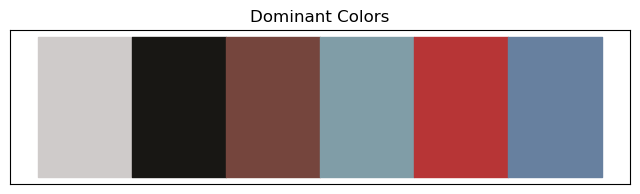

In [342]:
# Convert RGB 0-255 to 0-1 scale for matplotlib
palette_normalized = [(r/255, g/255, b/255) for r, g, b in palette]

# Plot color swatches
plt.figure(figsize=(8, 2))
for i, color in enumerate(palette_normalized):
    plt.fill_between([i, i+1], 0, 1, color=color)

plt.xticks([])
plt.yticks([])
plt.title('Dominant Colors')
plt.show()

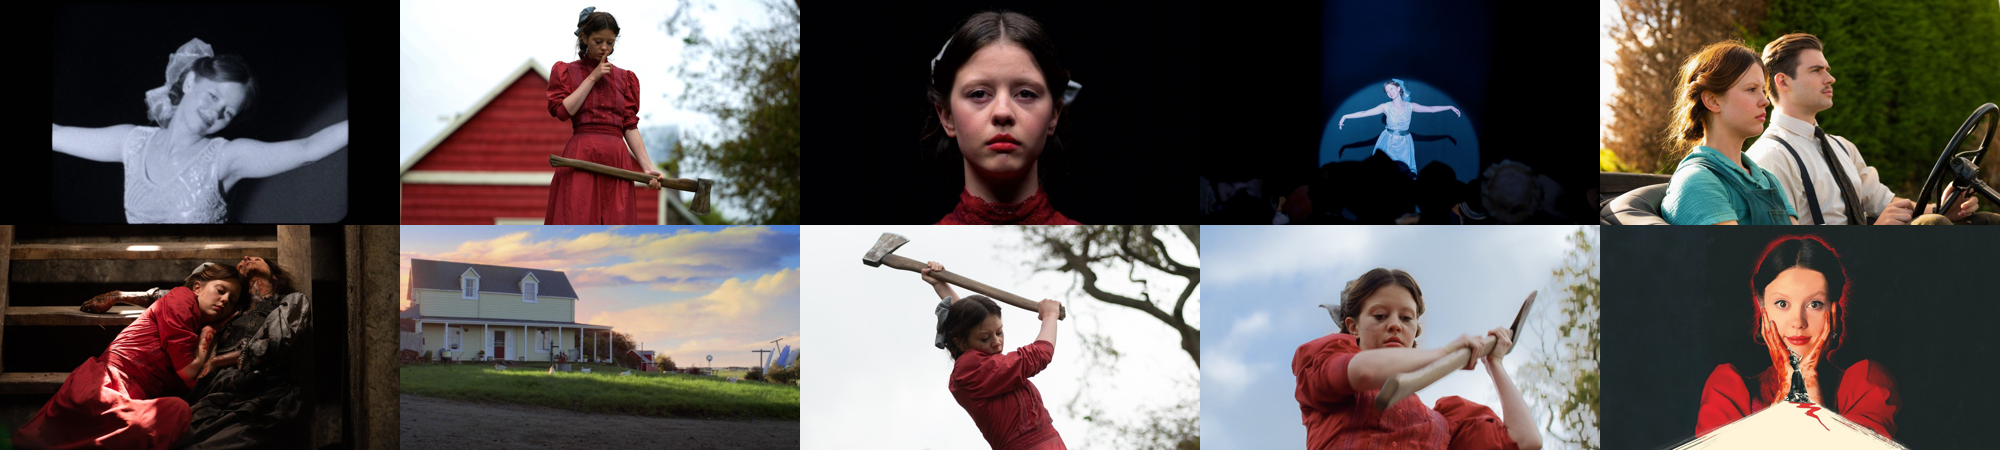

In [344]:
collage

In [348]:
dominant_colors = palette
angry_palette = [
    (255, 0, 0),     # Red
    (255, 69, 0),    # Orange Red
    (139, 0, 0),     # Dark Red
    (178, 34, 34),   # Firebrick
    (220, 20, 60),   # Crimson
    (255, 99, 71),   # Tomato
    (128, 0, 0),     # Maroon
    (255, 36, 0)     # Scarlet
]

sad_palette = [
    (64, 64, 64),    # Dark Grey
    (70, 130, 180),  # Steel Blue
    (95, 158, 160),  # Cadet Blue
    (105, 105, 105), # Dark Slate Gray
    (119, 136, 153), # Light Slate Gray
    (72, 61, 139),   # Dark Slate Blue
    (100, 149, 237), # Cornflower Blue
    (176, 196, 222)  # Light Steel Blue
]

In [177]:
import math

In [350]:
# Function to calculate Euclidean distance between two RGB colors
def color_distance(c1, c2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(c1, c2)))

# Define a threshold for "similarity"
threshold = 40  # tweak this depending on how strict you want it

# Count matches
matches = 0

for color in dominant_colors:
    # Check if color is close to any angry color
    if any(color_distance(color, angry_color) < threshold for angry_color in angry_palette):
        matches += 1

# Calculate percentage match
percentage_match = (matches / len(dominant_colors)) * 100

print(f"Similarity with 'Angry' palette: {percentage_match:.2f}%")

Similarity with 'Angry' palette: 16.67%


In [352]:
def color_distance(c1, c2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(c1, c2)))

def similarity_percentage(dominant_colors, palette, threshold=60):
    matches = 0
    for color in dominant_colors:
        if any(color_distance(color, p_color) < threshold for p_color in palette):
            matches += 1
    return (matches / len(dominant_colors)) * 100

# Calculate similarity
angry_similarity = similarity_percentage(dominant_colors, angry_palette)
sad_similarity = similarity_percentage(dominant_colors, sad_palette)

combined_similarity = angry_similarity + sad_similarity

print(f"Angry similarity: {angry_similarity:.2f}%")
print(f"Sad similarity: {sad_similarity:.2f}%")
print(f"Combined similarity: {combined_similarity:.2f}%")

Angry similarity: 16.67%
Sad similarity: 66.67%
Combined similarity: 83.33%



🎭 Emotion Matching Results:
Sad: 59.89%
Angry: 17.75%
Combined match confidence: 77.64%

🎬 Most likely mood: Sad


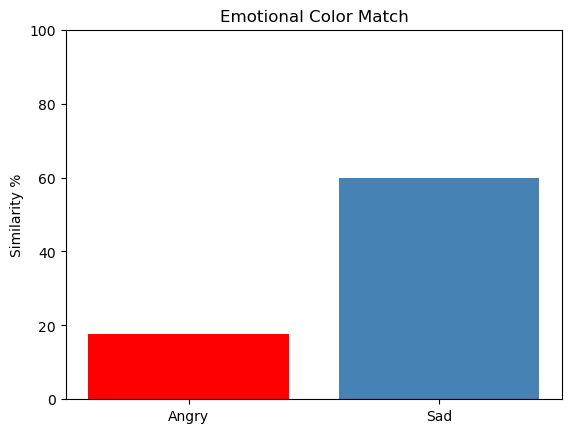

In [354]:
from skimage.color import rgb2lab
import numpy as np
from math import exp
import matplotlib.pyplot as plt

# Example: Dominant colors from ColorThief
dominant_colors_rgb = dominant_colors

# Define emotion palettes
emotion_palettes_rgb = {
    "Angry": [
        (255, 0, 0), (255, 69, 0), (139, 0, 0),
        (178, 34, 34), (220, 20, 60), (255, 99, 71),
        (128, 0, 0), (255, 36, 0)
    ],
    "Sad": [
        (64, 64, 64), (70, 130, 180), (95, 158, 160),
        (105, 105, 105), (119, 136, 153), (72, 61, 139),
        (100, 149, 237), (176, 196, 222)
    ]
}

# Convert RGB to CIELAB
def rgb_to_lab(color_rgb):
    arr = np.array([[color_rgb]], dtype=np.uint8) / 255.0
    return rgb2lab(arr)[0][0]

# Soft similarity function: closer = higher score (like Gaussian decay)
def similarity_score(lab1, lab2, sigma=20):
    dist = np.linalg.norm(np.array(lab1) - np.array(lab2))
    return exp(- (dist ** 2) / (2 * sigma ** 2))

# Step 1: Convert all colors to LAB
dominant_colors_lab = [rgb_to_lab(c) for c in dominant_colors_rgb]
emotion_palettes_lab = {
    emotion: [rgb_to_lab(c) for c in colors]
    for emotion, colors in emotion_palettes_rgb.items()
}

# Step 2: Score similarities
emotion_scores = {}
for emotion, palette_lab in emotion_palettes_lab.items():
    score = 0
    for dc in dominant_colors_lab:
        # Best match in palette for this dominant color
        best = max(similarity_score(dc, pc) for pc in palette_lab)
        score += best
    # Normalize by number of dominant colors (range 0–1)
    emotion_scores[emotion] = (score / len(dominant_colors_lab)) * 100

# Step 3: Output results
sorted_emotions = sorted(emotion_scores.items(), key=lambda x: x[1], reverse=True)

print("\n🎭 Emotion Matching Results:")

combined_percent = 0
for emotion, score in sorted_emotions:
    print(f"{emotion}: {score:.2f}%")
    combined_percent += score

print(f"Combined match confidence: {combined_percent:.2f}%")
    

print(f"\n🎬 Most likely mood: {sorted_emotions[0][0]}")

# Optional: Bar chart
plt.bar(emotion_scores.keys(), emotion_scores.values(), color=["red", "steelblue"])
plt.ylabel("Similarity %")
plt.title("Emotional Color Match")
plt.ylim(0, 100)
plt.show()


# Final look? 

In [358]:
import requests
from bs4 import BeautifulSoup as bs
import json
from PIL import Image
from io import BytesIO
from colorthief import ColorThief
import matplotlib.pyplot as plt
import random
import pandas as pd 
import numpy as np 

In [382]:
api_key = "3039136bdade60a401af3af4c8024a39"  
params = {"api_key": api_key}
headers = {"accept": "application/json"}

In [390]:
top_movies = []
page = 1

while len(top_movies) < 20:
    url = 'https://api.themoviedb.org/3/movie/top_rated'
    params = {
        'api_key': api_key,
        'page': page
    }
    response = requests.get(url, params=params)
    data = response.json()

    results = data.get('results', [])
    top_movies.extend(results)
    page += 1

In [392]:
movies_data = []

for movie in top_movies:
    movie_id = movie.get('id')
    
    # Fetch all images for the current movie
    images_url = f'https://api.themoviedb.org/3/movie/{movie_id}/images'
    response = requests.get(images_url, params={'api_key': api_key})
    
    # Handle rate limits or bad responses
    if response.status_code != 200:
        print(f"Failed to fetch images for movie ID {movie_id}")
        backdrops = []
    else:
        images_data = response.json()
        backdrops = images_data.get('backdrops', [])
    
    # Randomly select up to 10 backdrops (you can use choices() if repetition is okay)
    selected_backdrops = random.sample(backdrops, min(10, len(backdrops)))
    
    # Construct full backdrop URLs
    backdrop_urls = [f"https://image.tmdb.org/t/p/w1280{img['file_path']}" for img in selected_backdrops]

    # Add all movie info
    movies_data.append({
        'id': movie_id,
        'title': movie.get('title'),
        'description': movie.get('overview'),
        'rating': movie.get('vote_average'),
        'poster_url': f"https://image.tmdb.org/t/p/w500{movie.get('poster_path')}" if movie.get('poster_path') else None,
        'backdrop_url': f"https://image.tmdb.org/t/p/w1280{movie.get('backdrop_path')}" if movie.get('backdrop_path') else None,
        'backdrop_urls': backdrop_urls  # List of up to 10 URLs
    })

# Create DataFrame
df = pd.DataFrame(movies_data)

In [404]:
df

,id,title,description,rating,poster_url,backdrop_url,backdrop_urls
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,8.700,https://image.tmdb.org/t/p/w500/9cqNxx0GxF0bfl...,https://image.tmdb.org/t/p/w1280/zfbjgQE1uSd9w...,[https://image.tmdb.org/t/p/w1280/ddzwhOgb35Ez...
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",8.686,https://image.tmdb.org/t/p/w500/3bhkrj58Vtu7en...,https://image.tmdb.org/t/p/w1280/tmU7GeKVybMWF...,[https://image.tmdb.org/t/p/w1280/6DkOlkOteKN4...
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,8.571,https://image.tmdb.org/t/p/w500/hek3koDUyRQk7F...,https://image.tmdb.org/t/p/w1280/kGzFbGhp99zva...,[https://image.tmdb.org/t/p/w1280/fqCCJISOQ6d4...
3,424,Schindler's List,The true story of how businessman Oskar Schind...,8.564,https://image.tmdb.org/t/p/w500/sF1U4EUQS8YHUY...,https://image.tmdb.org/t/p/w1280/zb6fM1CX41D9r...,[https://image.tmdb.org/t/p/w1280/xeDyrWmkmfxI...
4,389,12 Angry Men,The defense and the prosecution have rested an...,8.548,https://image.tmdb.org/t/p/w500/ow3wq89wM8qd5X...,https://image.tmdb.org/t/p/w1280/bxgTSUenZDHNF...,[https://image.tmdb.org/t/p/w1280/tJ1kXgmW9izw...
5,129,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",8.537,https://image.tmdb.org/t/p/w500/39wmItIWsg5sZM...,https://image.tmdb.org/t/p/w1280/m4TUa2ciEWSlk...,[https://image.tmdb.org/t/p/w1280/b34rAQGpY5DM...
6,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,8.520,https://image.tmdb.org/t/p/w500/qJ2tW6WMUDux91...,https://image.tmdb.org/t/p/w1280/enNubozHn9pXi...,[https://image.tmdb.org/t/p/w1280/gJjZQUdtp16D...
7,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",8.517,https://image.tmdb.org/t/p/w500/2CAL2433ZeIihf...,https://image.tmdb.org/t/p/w1280/90ez6ArvpO8bv...,[https://image.tmdb.org/t/p/w1280/Vxj4zp30GURW...
8,497,The Green Mile,A supernatural tale set on death row in a Sout...,8.505,https://image.tmdb.org/t/p/w500/8VG8fDNiy50H4F...,https://image.tmdb.org/t/p/w1280/amZavErrjrdgD...,[https://image.tmdb.org/t/p/w1280/xt7WTyrCIhHC...
9,496243,Parasite,"All unemployed, Ki-taek's family takes peculia...",8.499,https://image.tmdb.org/t/p/w500/7IiTTgloJzvGI1...,https://image.tmdb.org/t/p/w1280/hiKmpZMGZsrkA...,[https://image.tmdb.org/t/p/w1280/5CPxIddxBUyy...


In [406]:
target_size = (400, 225)
rows, cols = 2, 5

def create_collage_from_urls(urls):
    images = []
    for url in urls:
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content)).convert("RGB")
            img = img.resize(target_size)
            images.append(img)
        except Exception as e:
            print(f"Failed to load image {url}: {e}")
    
    collage_width = target_size[0] * cols
    collage_height = target_size[1] * rows
    collage = Image.new("RGB", (collage_width, collage_height))
    
    for i, img in enumerate(images):
        row = i // cols
        col = i % cols
        x = col * target_size[0]
        y = row * target_size[1]
        collage.paste(img, (x, y))
    
    return collage

In [408]:
df['collage'] = df['backdrop_urls'].apply(create_collage_from_urls)

In [416]:
def extract_dominant_colors(image, color_count=6):
    """
    Extract dominant colors from a PIL Image using ColorThief.

    Args:
        image (PIL.Image): The collage image.
        color_count (int): Number of dominant colors to extract.

    Returns:
        List of RGB tuples, e.g. [(r, g, b), ...]
    """
    buffer = BytesIO()
    image.save(buffer, format='JPEG')  # or PNG
    buffer.seek(0)

    color_thief = ColorThief(buffer)
    palette = color_thief.get_palette(color_count=color_count)
    return palette

In [418]:
df['dominant_colors'] = df['collage'].apply(extract_dominant_colors)

In [434]:
df.iloc[2]['dominant_colors']

[(222, 183, 148),
 (49, 32, 20),
 (144, 102, 63),
 (147, 173, 177),
 (120, 136, 150),
 (105, 101, 76)]

In [436]:
df.to_csv('Movies_Data.csv', index=False)

In [438]:
df

,id,title,description,rating,poster_url,backdrop_url,backdrop_urls,collage,dominant_colors
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,8.700,https://image.tmdb.org/t/p/w500/9cqNxx0GxF0bfl...,https://image.tmdb.org/t/p/w1280/zfbjgQE1uSd9w...,[https://image.tmdb.org/t/p/w1280/ddzwhOgb35Ez...,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(46, 36, 36), (215, 185, 158), (138, 95, 72),..."
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",8.686,https://image.tmdb.org/t/p/w500/3bhkrj58Vtu7en...,https://image.tmdb.org/t/p/w1280/tmU7GeKVybMWF...,[https://image.tmdb.org/t/p/w1280/6DkOlkOteKN4...,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(37, 28, 21), (224, 207, 183), (126, 93, 69),..."
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,8.571,https://image.tmdb.org/t/p/w500/hek3koDUyRQk7F...,https://image.tmdb.org/t/p/w1280/kGzFbGhp99zva...,[https://image.tmdb.org/t/p/w1280/fqCCJISOQ6d4...,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(222, 183, 148), (49, 32, 20), (144, 102, 63)..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,8.564,https://image.tmdb.org/t/p/w500/sF1U4EUQS8YHUY...,https://image.tmdb.org/t/p/w1280/zb6fM1CX41D9r...,[https://image.tmdb.org/t/p/w1280/xeDyrWmkmfxI...,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(32, 32, 32), (199, 194, 190), (117, 113, 112..."
4,389,12 Angry Men,The defense and the prosecution have rested an...,8.548,https://image.tmdb.org/t/p/w500/ow3wq89wM8qd5X...,https://image.tmdb.org/t/p/w1280/bxgTSUenZDHNF...,[https://image.tmdb.org/t/p/w1280/tJ1kXgmW9izw...,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(210, 163, 134), (35, 35, 35), (132, 78, 75),..."
5,129,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",8.537,https://image.tmdb.org/t/p/w500/39wmItIWsg5sZM...,https://image.tmdb.org/t/p/w1280/m4TUa2ciEWSlk...,[https://image.tmdb.org/t/p/w1280/b34rAQGpY5DM...,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(209, 175, 162), (33, 40, 49), (123, 174, 183..."
6,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,8.520,https://image.tmdb.org/t/p/w500/qJ2tW6WMUDux91...,https://image.tmdb.org/t/p/w1280/enNubozHn9pXi...,[https://image.tmdb.org/t/p/w1280/gJjZQUdtp16D...,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(198, 180, 160), (21, 25, 27), (89, 165, 174)..."
7,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",8.517,https://image.tmdb.org/t/p/w500/2CAL2433ZeIihf...,https://image.tmdb.org/t/p/w1280/90ez6ArvpO8bv...,[https://image.tmdb.org/t/p/w1280/Vxj4zp30GURW...,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(37, 36, 29), (190, 141, 145), (125, 174, 173..."
8,497,The Green Mile,A supernatural tale set on death row in a Sout...,8.505,https://image.tmdb.org/t/p/w500/8VG8fDNiy50H4F...,https://image.tmdb.org/t/p/w1280/amZavErrjrdgD...,[https://image.tmdb.org/t/p/w1280/xt7WTyrCIhHC...,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(193, 148, 108), (22, 23, 20), (108, 77, 53),..."
9,496243,Parasite,"All unemployed, Ki-taek's family takes peculia...",8.499,https://image.tmdb.org/t/p/w500/7IiTTgloJzvGI1...,https://image.tmdb.org/t/p/w1280/hiKmpZMGZsrkA...,[https://image.tmdb.org/t/p/w1280/5CPxIddxBUyy...,<PIL.Image.Image image mode=RGB size=2000x450 ...,"[(36, 35, 32), (187, 176, 160), (116, 103, 83)..."
